# **PRÁCTICA 2:  Machine Learning - Parte 2: División del conjunto de datos**
### Universitat de València, Escola Tecnica Superior d'Enginyeria
### Elena Marrero Castellano | 3ª curso del Grado Ciencia de Datos

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 1.2 Hold-out


Consiste en dividir el conjunto de datos en dos, una para entrenar el modelo y otra para testearlo. También se recurre al *hold-out* en caso de que el modelo a utilizar tenga parámetros que ajustar. Para ello la partición de entrenamiento se divide a su vez en entrenamiento y validación. El conjunto de entrenamiento se usa para entrenar el modelo probando diferentes combinaciones de parámetros, y el conjunto de validación para comprobar el funcionamiento del modelo con dichas combinaciones. Al final se escoge el conjunto de parámetros que mejor resultados haya obtenido, y como paso final se reentrena el modelo utilizando todos el conjunto de entrenamiento. En la siguiente práctica usaremos los métodos vistos en estas para ajustar los parámetros de un modelo SVM.

Es importante resaltar que en todo este proceso no se usa para nada el conjunto de test, cuya finalidad es **únicamente** comprobar el rendimiento del modelo final.

En la práctica anterior vimos como scikit-learn nos ofrece una función para realizar este tipo de división del conjunto de datos, `train_test_split`. En esta práctica vamos a ver cómo podemos hacerlo "a mano".

### Lo primero que necesitamos es un conjunto de datos para trabajar

In [ ]:
# Vamos a trabajar con un problema de regresión inventado con 200 muestras, 10 dimensiones, de las cuales solo 8 son 
# informativas. Solamente tenemos que predecir una única variable.

from sklearn.datasets import make_regression
X, y = make_regression(n_samples=200, n_features=10, n_informative=8, n_targets=1,
                       # Se ha añadido un poco de ruido para que el problema sea un poco más dificil de resolver. 
                       # Por último tenemos el parámetro  random_state que es para que todos obtengamos unos 
                       # resultados similares.
                       noise=0.1, random_state=1234) 


### Vamos a dividirlo usando una partición aleatoria. Usaremos  `np.random.permutation`.

In [ ]:
# Lo que vamos a ahcer va a ser realizar el hold out pero a mano.

ptrain = 2/3  # % muestras entrenamiento
N = X.shape[0]

idx = np.random.permutation(N) # Hacemos una permutación de los n elementos

ntrain = np.fix(N * ptrain).astype('int') # ntrain, es el númoer de muestras de entrenamiento 

# Con esto ya podemos definir el conjunto de entrenamiento
Xtrain = X[idx[:ntrain], :]
ytrain = y[idx[:ntrain]]

### Ejercicio: obtén los elementos del conjunto de test

In [ ]:
Xtest = X[idx[ntrain:], :] 
ytest = y[idx[ntrain:]]

### Necesitamos un modelo para nuestros experimentos. Usaremos un modelo sencillo de regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 

### Primera prueba: vamos a entrenar y testear nuestro modelo usando solo el conjunto de entrenamiento

In [ ]:
lr.fit(Xtrain, ytrain) 
# Por defecto `score` calcula el índice de correlación de Pearson al cuadrado
R2 = lr.score(Xtrain, ytrain)

El coeficiente de correlación al cuadrado, $R^2$, es una buena métrica, pero la mayoría de las veces queremos validar nuestro resultados usando varias (no nos fiamos de una sola, ¿por qué?)

Métricas muy usadas son el root mean square error (RMSE) o el mean absolute error (MAE)
- RMSE = $\sqrt{\frac{1}{N}\sum_{i=0}^{N-1}(y_i-\hat{y_i})^2}$
- MAE =  $\frac{1}{N}\sum_{i=0}^{N-1}|y_i-\hat{y_i}|$

#### Respuesta a la pregunta: 

No nos fiamos de una sola métrica para decidir si un modelo es bueno o no lo es. Vamos a querer medirlo de varias maneras para poder tener otras opiniones ,porque una nos puede decir que es muy buena pero otra de las métricas me podría decir que no tanto. Cada métrica nos informa de diferentes aspectos. En este caso vamos a mirarlo también con RMSE que escoge los residuos del modelo, la diferencia entre los valores reales y los valores predichos al cuadrado, suma de todos (la media) y de todo eso su raiz cuadrada. También tenemos el MAE, donde realizamos la media de la diferencia de los residuos, es decir el valor predicho y el valor real.

In [ ]:
def rmse(y, yp):
    return np.sqrt(np.sum((y-yp)**2) / y.shape[0])

### Ejercicio: crea una función para calcular el MAE

In [ ]:
def mae(y, yp):
    return np.sum(np.abs((y-yp)) / y.shape[0])

### Por supuesto, scikit-learn tiene unas cuantas de estas funciones implementadas ...
`from sklearn.metrics import mean_squared_error, mean_absolute_error`

### Veamos resultados

In [ ]:
yp = lr.predict(Xtrain) # Predecimos utilizando el conjunto de entrenamiento
print('R2', R2, 'RMSE', rmse(ytrain, yp), 'MAE', mae(ytrain, yp))

R2 0.99999972766987 RMSE 0.09079064223763982 MAE 0.07166796708724088


#### NOTA RESULTADOS:

R2, es súper buena, muy cercana a la unidad.   
RMSE, es muy bajo, que a diferencia del R2 cuanto más bajo mejor.   
MAE, nos ha dado también un valore pequeño y esto es bueno.   

### Fíjate en dos cosas:
1. Cada métrica informa de la "bondad" del modelo atendiendo a características diferentes. ¿De qué nos informa cada una de estas métricas?
2. Toma nota de estos valores para compararlos con los que obtengamos después.

El obtener resultados usando un mismo conjunto para todo (entrenamiento y test) nos puede dar (y seguramente lo hará) una versión poco realista del rendimiento del modelo. Otro riesgo adicional es que el modelo puede "sobreenternarse", aprendiéndose los datos de entrenamiento "de memoria" pero siendo incapaz de predecir correctamente sobre datos que no haya "visto" previamente. A este fenómeno se le conoce como *overfitting* y hay que tratar de evitarlo al entrenar nuestros modelos.

¿Qué pasará cuando usemos nuestro modelo sobre nuevos datos? ¿Seguirá funcionando igual?



### Comprobémoslo!!
### Ejercicio: comprueba nuestro modelo sobre el conjunto de test

In [ ]:
R2 = lr.score(Xtest, ytest)
yt = lr.predict(Xtest)
print("R2", R2, "RMSE", rmse(ytest, yt), "MAE" , mae(ytest, yt))

R2 0.9999997226645811 RMSE 0.09826369966869719 MAE 0.08001842028122112


### ¿Qué resultados se han obtenido? Compáralos con los obtenidos antes y comenta los resultados.



Lo que podemos ver es que aunque sea ligereamente, nos da un poco más de error cuando uilizamos los datos de test que cuando utilizamos los datos de entrenamiento. 

Que no sean mucho más alto, es una buena señal. En cuanto al modelo, podemos empezar a pensar que sigue siendo bueno ya que cuando lo utilizamos en datos que el no a visto nunca en entrenamiento, sigue funcionando correctamente.

## 1.3 k-fold


Una pega del método *hold-out* es que al particionar aleatoriamente el conjunto de datos podría darse el caso que justamente esta partición fuera especialmente idónea a la hora de entrenar y testear, dándonos resultados aparentemente demasiado buenos.

Una opción para evitar esta duda es particionar el conjunto varias veces e ir probando diferentes combinaciones de conjuntos de entrenamiento y test. Si esto lo hacemos de manera sistemática tenemos el k-fold (o v-fold), ilustrado en la figura.

<img alt="k-fold" src="kfold.png" width="500px">

### En esta ocasión vamos a utilizar las funciones de scikit-learn para realizar las particiones
### Ejercicio: completa el código mostrado abajo para entrenar y testear con *k-fold*

In [ ]:
%%time
# Usamos KFold de scikit-learn
from sklearn.model_selection import KFold

nf = 5  # number of folds
kf_r2, kf_rmse, kf_mae = [], [], []  # Listas para ir almacenando los resultados
kf = KFold(n_splits=nf, shuffle=True, random_state=1234)
for train, test in kf.split(X):  # pregunta: daría igual poner kf.split(X,y)?
    Xtrain, ytrain = X[train, :], y[train]
    
    # Completa -----------------------
    # 1. Obtén los datos de test
    Xtest, ytest = X[test, :], y[test]
    # 2. Entrena el modelo (fit) con el conjunto de entrenamiento
    lr.fit(Xtrain, ytrain)    
    # 3. Predice sobre los datos de test
    yt = lr.predict(Xtest)
    # 4. Calcula las métricas r2, rmse y mae
    R2 = lr.score(Xtest, ytest)
    RMSE = rmse(ytest, yt)
    MAE = mae(ytest, yt)
    # 5. Añádelas a las listas kf_r2, kf_rmse y kf_mae
    kf_r2.append(R2)
    kf_rmse.append(RMSE)
    kf_mae.append(MAE)

CPU times: user 28.5 ms, sys: 2.56 ms, total: 31 ms
Wall time: 8.57 ms


In [ ]:
# Veamos resultados
print('R2', kf_r2)
print('RMSE', kf_rmse)
print('MAE', kf_mae)

# Muestra directamnte las 5 resultados independientes. Lo que se suele hacer es sacar la media de todo este y es lo 
# que te quedas coo error de predicción del modelo cuando se enfrente a datos que nunca ha visto. 

R2 [0.9999998085566812, 0.9999997416959893, 0.999999613973702, 0.9999996089950625, 0.9999996272417969]
RMSE [0.09014819952579126, 0.08707116242950337, 0.09633149415494903, 0.09592621434044604, 0.11608411054503705]
MAE [0.07685701638026765, 0.07043667214656232, 0.07919283352562063, 0.07202383449365853, 0.09138905979105949]


### ¿Se obtienen valores de las métricas parecidas para cada conjunto *k-fold*?

Como podemos observar arriba en el caso de R2 obtenemos valores bastante similares en cada uno de los resultados, mientras que en RMSE y MAE estos valores difieren un poco más entre ellos, en algún que otro resultado, pero igualemente siguen sieno similares.

### Ejercicio: obtén los valores promedio de las métricas calculadas
Compara los resultados con los obtenidos mediante *hold-out*

In [ ]:
print("R2_PROM: ", sum(kf_r2)/5, "RMSE_PROM: ", sum(kf_rmse)/5, "MAE_PROM: ", sum(kf_mae)/5)


yp = lr.predict(Xtrain) # Predecimos utilizando el conjunto de entrenamiento
print('R2       ', R2, 'RMSE       ', rmse(ytrain, yp), 'MAE       ', mae(ytrain, yp))

R2_PROM:  0.9999996800926464 RMSE_PROM:  0.09711223619914534 MAE_PROM:  0.07797988326743373
R2        0.9999996272417969 RMSE        0.08671437954059523 MAE        0.06879133446338842


Como podemos ver arriba, los valores se diferencian por muy poco, el R2 tiene una diferencia de 0.0000000528508495, el RMSE por 0.01039785665855011 y por último el MAE con una diferencia de 0.00918854880404531.

## 1.4 leave-one-out


El leave-one-out es la versión extrema del k-fold con k = N muestras. Este es el test más exhaustivo de todos los vistos, y el que teóricamente mejor podría predecir el "verdadero" error de predicción de un modelo. Dado su potencialmente alto coste computacional (hay que entrenar N modelos con N-1 muestras)
se usa solo cuando tenemos pocos datos.

### Ejercicio: usa *leave-one-out* con nuestro conjunto de datos y modelo. Compara ...
1. Resultados.
2. Tiempo de cálculo

In [ ]:
%%time
# Pasar usar leave-one-out basta con usar KFold con N muestras.
# No obstante, scikit-learn provee the una clase LeaveOnOut directamente.
# Importante
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

# Preguta: para este experimento no usaremos el R2, ¿por qué?
loo_rmse, loo_mae = [], []
for train, test in loo.split(X):
    Xtrain, ytrain = X[train, :], y[train]
    # Completa ------------------------
    # 1. Obtén los datos de test
    Xtest, ytest = X[test, :], y[test]
    # 2. Entrena el modelo (fit) con el conjunto de entrenamiento
    lr.fit(Xtrain, ytrain)    
    # 3. Predice sobre los datos de test
    yt = lr.predict(Xtest)
    # 4. Calcula las métricas r2, rmse y mae
    RMSE = rmse(ytest, yt)
    MAE = mae(ytest, yt)
    # 5. Añádelas a las listas 
    loo_rmse.append(RMSE)
    loo_mae.append(MAE)
    
# Comparamos resultados 
# print('RMSE', loo_rmse)
# print('MAE', loo_mae)

CPU times: user 328 ms, sys: 4.01 ms, total: 332 ms
Wall time: 84.1 ms


### Comparamos tiempo de cálculo 

**k-fold:**   
CPU times: user 28.5 ms, sys: 2.56 ms, total: 31 ms   
Wall time: 8.57 ms   
**leave-one-out:**   
CPU times: user 408 ms, sys: 6.61 ms, total: 415 ms   
Wall time: 106 ms   

Podemos ver que con resspecto a los tiempos de cálculo el k-fold se realiza con más rapidez que el leave-one-out con una gran diferencia.

### Ejercicio: muestra gráficamente los resultados
Como tenemos muchos resultados es más práctico mostrar los resultados mediante gráficas

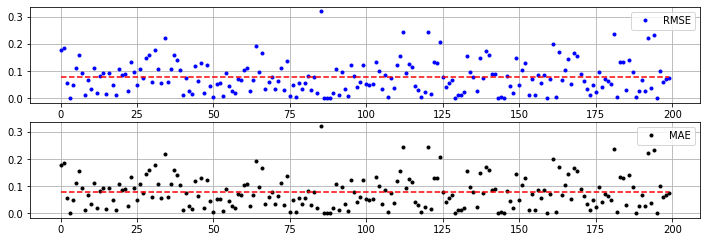

In [ ]:
# Muestra todos los resultados
# print('RMSE', loo_rmse)
# print('MAE', loo_mae)
plt.figure(figsize=(12,6))
plt.subplot(3,1,1), plt.plot(loo_rmse, 'b.', label='RMSE'), plt.grid(), plt.legend()
plt.plot(np.mean(loo_rmse) * np.ones(len(loo_rmse)), 'r--')
plt.subplot(3,1,2), plt.plot(loo_mae, 'k.', label='MAE'), plt.grid(), plt.legend()
plt.plot(np.mean(loo_mae) * np.ones(len(loo_mae)), 'r--');

In [ ]:
# Muestra medias
print('RMSE', np.mean(loo_rmse))
print('MAE', np.mean(loo_mae))

RMSE 0.07797775741691128
MAE 0.07797775741691128


### Pregunta: ¿por qué en este experimento el RMSE y el MAE salen iguales?
RMSE y MAE salen iguales porque se ha aplicado sobre un único valor.

<img alt="No se vayan todavía, aún hay más!"
     src="no-se-vayan.png">

LeavePOut: es como KFold pero al revés, se escogen P muestras del conjunto de test.
Ojo porque esto no es equivalente a hacer `KFold(n_splits=n_samples // p)`. LeavePOut prueba todas las posibles combinaciones posibles de P elementos para testear, dejando las restantes N-P muestras para entrenar. Esto tiene un muy alto coste computacional si la combinatoria de N elementos tomados en grupos de P es alta (y es fácil que lo sea).

`from sklearn.model_selection import LeavePOut`

SuffleSplit: parecido a KFold pero las particiones se generan de forma aleatoria

`from sklearn.model_selection import ShuffleSplit`